# AccelerateAI: Clustering

## Context

### Hierarchical Clustering

- Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters 
- The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

**Type of Hierarchical Clustering**
1. **Agglomerative Clustering** which is a method of clustering which builds a hierarchy of clusters by merging together small clusters, it is a **bottom up approach**

2. **Divisive Clustering**, is a **top down approach** where we consider all the observation as a single big cluster and then divide into small clusters  

### Dendrogram

- The dendrogram is a visual representation of the compound correlation data
- The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes
- Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node

### Silhouette Score

- Clusters are well apart from each other as the silhouette score is closer to 1
- Silhouette Coefficient score is a metric used to **calculate the goodness of a clustering technique** 
- Its value ranges from -1 to 1.
    1. **Score = 1: Means clusters are well apart** from each other and clearly distinguished.
    2. **Score = 0: Means clusters are indifferent**, or we can say that the distance between clusters is not significant.
    3. **Score = -1: Means clusters are assigned in the wrong way**

## Example

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

from scipy.spatial import distance # To calculate distances
from IPython.display import Image
import scipy.cluster.hierarchy as sch

Let us consider a simpler dataset.

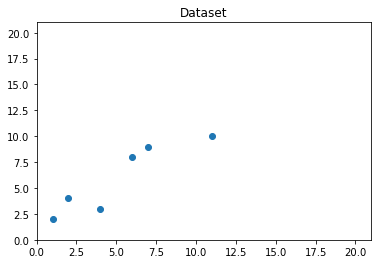

In [2]:
x_axis = np.array([1,2,4,6,7,11])
y_axis = np.array([2,4,3,8,9,10])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

In [3]:
data

,x,y
0,1,2
1,2,4
2,4,3
3,6,8
4,7,9
5,11,10


### Dendrogram - Single Linkage

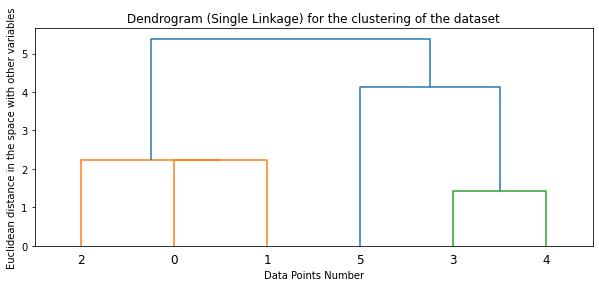

In [4]:
# Dendrogram (Single Linkage) 

Z = sch.linkage(data, method = 'single')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

plt.show()

### Dendrogram - Complete Linkage

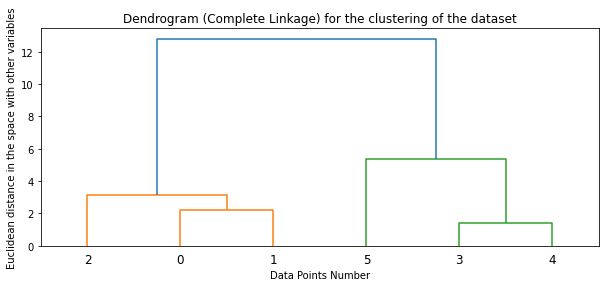

In [5]:
# Dendrogram (Complete Linkage) 

Z = sch.linkage(data, method = 'complete')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

plt.show()

### Dendrogram - Median Linkage

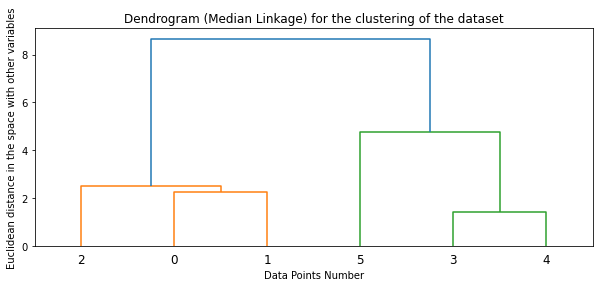

In [6]:
# Dendrogram (Median Linkage) 

Z = sch.linkage(data, method = 'median')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Median Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

plt.show()

### Dendrogram - Average Linkage

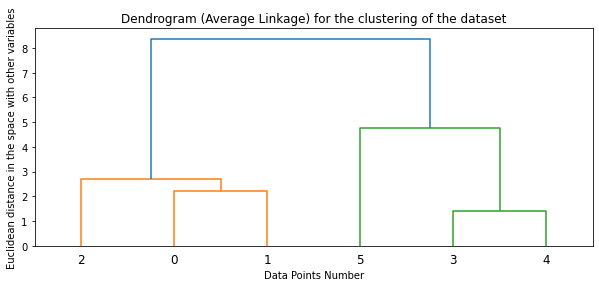

In [7]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(data, method = 'average')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

plt.show()

### Agglomerative HC

In [8]:
# Building an Agglomerative Clustering Model : Initialise Model
# We analyse the above-created dendrogram 
# decide that we will be making 2 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'average')
# Model Fit
model_clt = cluster_H.fit(data)
print(model_clt)
print('\n')

data['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(data['clusters'])

AgglomerativeClustering(linkage='average')


Clusters assigned to each datapoints, cluster = 2 :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int64


In [9]:
# Silhouette Score
data = pd.DataFrame({'x':x_axis, 'y':y_axis})
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2')

For cluster= 2, Silhouette Coefficient is 0.6246482279081483
For cluster= 3, Silhouette Coefficient is 0.5466071155359425
For cluster= 4, Silhouette Coefficient is 0.2812138638014983
For cluster= 5, Silhouette Coefficient is 0.23239832733258955


For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2
